# 斜面流の流出

$\dfrac{\partial h}{\partial t} + \dfrac{1}{b} \dfrac{\partial (bq)}{\partial x}= r_e$

$q=\alpha h ^m$

$\alpha = \sqrt{\sin \theta_s}/n_s$

$m=5/3$

$re = 50[mm/hr]$

$n = 0.015$



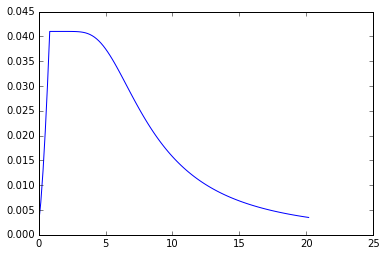

In [20]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
n = 0.015
# 単位を変換
re = 50.0/1000.0/3600.0
mx = 10
length = 200.0
dx = length / mx
dt = 10.0
theta = 10.0
alpha = math.sqrt(math.sin(theta/ 360.0*2*math.pi))/n
m = 5.0 / 3.0
b = []
h = []
hn = []
q = []
time_min = []
out = []
for i in range(mx):
    b.append(length)
    h.append(0.0)
    hn.append(0.0)
    q.append(0.0)
    #print(b[i])
for t in range(500):
    # 雨の設定
    if t * dt < 60:
        r = re
    else:
        r = 0.0
    for i in range(1,mx):
        hn[i] = h[i] + r * dt - m * alpha * h[i]**(m-1.0) * (h[i] - h[i-1])/dx*dt
    for i in range(1,mx):
        h[i] = hn[i]
        q[i] = alpha * h[i]**m
        
    #print (t*dt,h[mx-1])
    time_min.append(t*dt / 60.0)
    out.append(q[mx-1]*b[mx-1])
    if t * dt > 60 * 20:
        break
plt.plot(time_min,out)
